In [5]:
# import libraries
from statsbombpy import sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm

In [6]:
# obtain list of matches for specific cometition and season 
df_matches = sb.matches(competition_id=55, season_id=43)
df_matches

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3788753,2021-06-16,15:00:00.000,Europe - UEFA Euro,2020,Finland,Russia,0,1,available,...,2021-09-22T16:39:05.697512,2,Group Stage,Saint-Petersburg Stadium,Danny Desmond Makkelie,Markku Kanerva,Stanislav Cherchesov,1.1.0,2,2
1,3788765,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Turkey,3,1,available,...,2021-11-11T13:54:37.507376,3,Group Stage,Bakı Olimpiya Stadionu,Slavko Vinčić,Vladimir Petković,Şenol Güneş,1.1.0,2,2
2,3795107,2021-07-02,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Italy,1,2,available,...,2021-09-23T00:02:51.495862,5,Quarter-finals,Allianz Arena,Slavko Vinčić,Roberto Martínez Montoliú,Roberto Mancini,1.1.0,2,2
3,3795221,2021-07-07,21:00:00.000,Europe - UEFA Euro,2020,England,Denmark,2,1,available,...,2021-09-22T22:33:37.494366,6,Semi-finals,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Kasper Hjulmand,1.1.0,2,2
4,3795506,2021-07-11,21:00:00.000,Europe - UEFA Euro,2020,Italy,England,1,1,available,...,2021-09-22T22:40:31.690550,7,Final,Wembley Stadium,Björn Kuipers,Roberto Mancini,Gareth Southgate,1.1.0,2,2
5,3794688,2021-06-29,18:00:00.000,Europe - UEFA Euro,2020,England,Germany,2,0,available,...,2021-09-22T23:46:25.457149,4,Round of 16,Wembley Stadium,Danny Desmond Makkelie,Gareth Southgate,Joachim Löw,1.1.0,2,2
6,3794692,2021-06-29,21:00:00.000,Europe - UEFA Euro,2020,Sweden,Ukraine,1,2,available,...,2021-09-22T23:38:19.483199,4,Round of 16,Hampden Park,Daniele Orsato,Jan Olof Andersson,Andrii Shevchenko,1.1.0,2,2
7,3794686,2021-06-28,18:00:00.000,Europe - UEFA Euro,2020,Croatia,Spain,3,5,available,...,2021-09-22T23:30:10.428563,4,Round of 16,Parken,Cüneyt Çakιr,Zlatko Dalić,Luis Enrique Martínez García,1.1.0,2,2
8,3794687,2021-06-27,21:00:00.000,Europe - UEFA Euro,2020,Belgium,Portugal,1,0,available,...,2021-09-22T16:40:48.020474,4,Round of 16,Estadio de La Cartuja,Felix Brych,Roberto Martínez Montoliú,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3794685,2021-06-26,21:00:00.000,Europe - UEFA Euro,2020,Italy,Austria,2,1,available,...,2021-09-22T16:40:41.310001,4,Round of 16,Wembley Stadium,Anthony Taylor,Roberto Mancini,Franco Foda,1.1.0,2,2


In [7]:
# obtain event info for specific match
df_events = sb.events(match_id = 3788741)
df_events

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 4141, 'lineup': [{'player': {'id...",Turkey,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Italy,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:04:29.312,Injury Stoppage,NaN
3799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:04:31.909,Injury Stoppage,NaN
3800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:38:59.616,Injury Stoppage,NaN
3801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:07:12.643,Own Goal Against,NaN


In [8]:
df_throwIn = df_events.loc[df_events['pass_type'] == 'Throw-in']
df_throwIn

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:12.163,Pass,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:42.353,Pass,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:57.749,Pass,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:01:13.885,Pass,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:01:32.900,Pass,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:03:06.187,Pass,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:03:43.255,Pass,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:04:09.956,Pass,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:05:49.463,Pass,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:07:41.901,Pass,NaN


In [9]:
df_throwIn_sort = df_throwIn.sort_values(by = "index")
df_throwIn_sort

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:12.163,Pass,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:42.353,Pass,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:00:57.749,Pass,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:01:13.885,Pass,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:01:32.900,Pass,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:03:06.187,Pass,NaN
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:03:43.255,Pass,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:04:09.956,Pass,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,00:05:49.463,Pass,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Italy,00:07:41.901,Pass,NaN


In [10]:
# marking the complete first contact passes
df_throwIn_sort.pass_outcome = df_throwIn_sort.pass_outcome.fillna('Complete')
for row in df_throwIn_sort.index:
    if df_throwIn_sort["pass_outcome"][row]== "Injury Clearance":
        df_throwIn_sort["pass_outcome"][row]="Incomplete"
df_throwIn_sort["pass_outcome"]

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_59789/3678895308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_throwIn_sort["pass_outcome"][row]="Incomplete"


8         Complete
15        Complete
16        Complete
22        Complete
25        Complete
38      Incomplete
44        Complete
47        Complete
75        Complete
103       Complete
112       Complete
128       Complete
191       Complete
197       Complete
215       Complete
243       Complete
253       Complete
264       Complete
272       Complete
281     Incomplete
315     Incomplete
355     Incomplete
376       Complete
408       Complete
424       Complete
455       Complete
484       Complete
491       Complete
521       Complete
599       Complete
601       Complete
657       Complete
673     Incomplete
701       Complete
757       Complete
760       Complete
788       Complete
800       Complete
867       Complete
947       Complete
959       Complete
966       Complete
971       Complete
977       Complete
1035      Complete
Name: pass_outcome, dtype: object

In [11]:
df_throwIn_sort.drop(df_throwIn_sort.columns.difference(['pass_outcome','location', "pass_height", "pass_angle", "pass_length"]), 1, inplace=True)
df_throwIn_sort = df_throwIn_sort.reset_index()
df_throwIn_sort

/var/folders/n4/wr2pjk454g5cxqdbd2qywndc0000gn/T/ipykernel_59789/3272154864.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_throwIn_sort.drop(df_throwIn_sort.columns.difference(['pass_outcome','location', "pass_height", "pass_angle", "pass_length"]), 1, inplace=True)


,index,location,pass_angle,pass_height,pass_length,pass_outcome
0,8,"[43.1, 0.1]",2.876891,Low Pass,28.285154,Complete
1,15,"[91.1, 0.1]",0.897825,Low Pass,8.823832,Complete
2,16,"[83.0, 0.1]",1.229344,Low Pass,12.841339,Complete
3,22,"[64.3, 80.0]",-2.664129,Low Pass,25.896140,Complete
4,25,"[30.0, 0.1]",2.238189,Low Pass,27.627884,Complete
5,38,"[22.8, 0.1]",0.372398,High Pass,20.612860,Incomplete
6,44,"[76.0, 0.1]",0.915801,Low Pass,8.700575,Complete
7,47,"[67.9, 0.1]",2.732685,Low Pass,19.617340,Complete
8,75,"[57.0, 80.0]",-0.626047,Low Pass,8.021222,Complete
9,103,"[26.2, 80.0]",-1.884144,Low Pass,18.816216,Complete


In [12]:
df_split_loc = pd.DataFrame(df_throwIn_sort['location'].tolist(), columns=['x_loc', 'y_loc'])
df_split_loc

,x_loc,y_loc
0,43.1,0.1
1,91.1,0.1
2,83.0,0.1
3,64.3,80.0
4,30.0,0.1
5,22.8,0.1
6,76.0,0.1
7,67.9,0.1
8,57.0,80.0
9,26.2,80.0


In [13]:
df_throwIn_sorted=df_throwIn_sort.drop(columns="location")
df_throwIn_final = df_throwIn_sorted.assign(x_loc = df_split_loc["x_loc"], y_loc = df_split_loc["y_loc"])
df_throwIn_final

,index,pass_angle,pass_height,pass_length,pass_outcome,x_loc,y_loc
0,8,2.876891,Low Pass,28.285154,Complete,43.1,0.1
1,15,0.897825,Low Pass,8.823832,Complete,91.1,0.1
2,16,1.229344,Low Pass,12.841339,Complete,83.0,0.1
3,22,-2.664129,Low Pass,25.896140,Complete,64.3,80.0
4,25,2.238189,Low Pass,27.627884,Complete,30.0,0.1
5,38,0.372398,High Pass,20.612860,Incomplete,22.8,0.1
6,44,0.915801,Low Pass,8.700575,Complete,76.0,0.1
7,47,2.732685,Low Pass,19.617340,Complete,67.9,0.1
8,75,-0.626047,Low Pass,8.021222,Complete,57.0,80.0
9,103,-1.884144,Low Pass,18.816216,Complete,26.2,80.0


In [14]:
#convert "height" to dummy variable
df_throwIn_dummy = pd.get_dummies(df_throwIn_final, columns=['pass_height'], drop_first=True)
# high pass = 0, low pass = 1
df_throwIn_dummy.rename(columns={'pass_height_Low Pass':'pass_height'},inplace=True)
df_throwIn_dummy

,index,pass_angle,pass_length,pass_outcome,x_loc,y_loc,pass_height
0,8,2.876891,28.285154,Complete,43.1,0.1,1
1,15,0.897825,8.823832,Complete,91.1,0.1,1
2,16,1.229344,12.841339,Complete,83.0,0.1,1
3,22,-2.664129,25.896140,Complete,64.3,80.0,1
4,25,2.238189,27.627884,Complete,30.0,0.1,1
5,38,0.372398,20.612860,Incomplete,22.8,0.1,0
6,44,0.915801,8.700575,Complete,76.0,0.1,1
7,47,2.732685,19.617340,Complete,67.9,0.1,1
8,75,-0.626047,8.021222,Complete,57.0,80.0,1
9,103,-1.884144,18.816216,Complete,26.2,80.0,1


In [15]:
#convert "outcome" to dummy variable
df_throwIn_dummy1 = pd.get_dummies(df_throwIn_dummy, columns=['pass_outcome'], drop_first=True)
# complete = 0, incomplete = 1
df_throwIn_dummy1.rename(columns={'pass_outcome_Incomplete':'pass_outcome'},inplace=True)
df_throwIn_dummy1

,index,pass_angle,pass_length,x_loc,y_loc,pass_height,pass_outcome
0,8,2.876891,28.285154,43.1,0.1,1,0
1,15,0.897825,8.823832,91.1,0.1,1,0
2,16,1.229344,12.841339,83.0,0.1,1,0
3,22,-2.664129,25.896140,64.3,80.0,1,0
4,25,2.238189,27.627884,30.0,0.1,1,0
5,38,0.372398,20.612860,22.8,0.1,0,1
6,44,0.915801,8.700575,76.0,0.1,1,0
7,47,2.732685,19.617340,67.9,0.1,1,0
8,75,-0.626047,8.021222,57.0,80.0,1,0
9,103,-1.884144,18.816216,26.2,80.0,1,0


In [16]:
df_throwIn_dummy1

,index,pass_angle,pass_length,x_loc,y_loc,pass_height,pass_outcome
0,8,2.876891,28.285154,43.1,0.1,1,0
1,15,0.897825,8.823832,91.1,0.1,1,0
2,16,1.229344,12.841339,83.0,0.1,1,0
3,22,-2.664129,25.896140,64.3,80.0,1,0
4,25,2.238189,27.627884,30.0,0.1,1,0
5,38,0.372398,20.612860,22.8,0.1,0,1
6,44,0.915801,8.700575,76.0,0.1,1,0
7,47,2.732685,19.617340,67.9,0.1,1,0
8,75,-0.626047,8.021222,57.0,80.0,1,0
9,103,-1.884144,18.816216,26.2,80.0,1,0


In [30]:
# x = df_throwIn_dummy1[['pass_angle','pass_length','x_loc','y_loc','pass_height']]
x = df_throwIn_dummy1[['pass_angle']]
x = sm.add_constant(x)
np.asarray(x)

array([[ 1.        ,  2.876891  ],
       [ 1.        ,  0.8978253 ],
       [ 1.        ,  1.2293439 ],
       [ 1.        , -2.664129  ],
       [ 1.        ,  2.2381885 ],
       [ 1.        ,  0.37239844],
       [ 1.        ,  0.91580147],
       [ 1.        ,  2.7326849 ],
       [ 1.        , -0.62604654],
       [ 1.        , -1.8841437 ],
       [ 1.        , -0.6234308 ],
       [ 1.        , -0.8228806 ],
       [ 1.        , -2.7632298 ],
       [ 1.        ,  1.0293491 ],
       [ 1.        ,  1.2532474 ],
       [ 1.        ,  2.2520945 ],
       [ 1.        , -0.45799795],
       [ 1.        ,  2.547379  ],
       [ 1.        , -0.71106726],
       [ 1.        ,  1.8854296 ],
       [ 1.        ,  0.2243157 ],
       [ 1.        ,  0.17579791],
       [ 1.        , -1.285839  ],
       [ 1.        , -2.6537561 ],
       [ 1.        , -2.4329665 ],
       [ 1.        , -2.1112158 ],
       [ 1.        , -2.9176154 ],
       [ 1.        , -2.2607005 ],
       [ 1.        ,

In [31]:
y = df_throwIn_dummy1['pass_outcome']
y
np.asarray(y)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [32]:
model = sm.OLS(y, x)

In [33]:
results = model.fit()

In [34]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           pass_outcome   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                   0.07343
Date:                Wed, 27 Jul 2022   Prob (F-statistic):              0.788
Time:                        23:03:38   Log-Likelihood:                -11.726
No. Observations:                  45   AIC:                             27.45
Df Residuals:                      43   BIC:                             31.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1108      0.048      2.313      0.0

In [35]:
print(f"coefficient of determination: {results.rsquared}")

print(f"adjusted coefficient of determination: {results.rsquared_adj}")

print(f"regression coefficients: {results.params}")

coefficient of determination: 0.0017047954284399314
adjusted coefficient of determination: -0.021511372119735972
regression coefficients: const         0.110791
pass_angle    0.007117
dtype: float64


In [36]:
print(f"predicted response:\n{results.fittedvalues}")

predicted response:
0     0.131266
1     0.117181
2     0.119541
3     0.091830
4     0.126721
5     0.113442
6     0.117309
7     0.130240
8     0.106335
9     0.097381
10    0.106354
11    0.104935
12    0.091125
13    0.118117
14    0.119711
15    0.126820
16    0.107532
17    0.128921
18    0.105730
19    0.124210
20    0.112388
21    0.112042
22    0.101640
23    0.091904
24    0.093475
25    0.095765
26    0.090026
27    0.094701
28    0.095495
29    0.113030
30    0.112511
31    0.125589
32    0.101051
33    0.131904
34    0.123437
35    0.119101
36    0.113954
37    0.093439
38    0.102528
39    0.129782
40    0.128422
41    0.091116
42    0.117278
43    0.107242
44    0.117479
dtype: float64


In [59]:
X = df_throwIn_dummy1[['pass_angle','pass_length','x_loc','y_loc','pass_height']]
# X = df_throwIn_dummy1['pass_length'].values
Y = df_throwIn_dummy1['pass_outcome'].values

In [60]:
print(X.shape, Y.shape)

(45, 5) (45,)


In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [63]:
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression()

In [64]:
y_pred = ml.predict(x_test)
print(y_pred)

[0.12921003 0.13503712 0.1346513  0.12486879 0.13109118 0.13432626
 0.13440886 0.13152487 0.13226027 0.12521439 0.12905159 0.12924781
 0.13574679 0.12706245]


In [65]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.05738077608145997

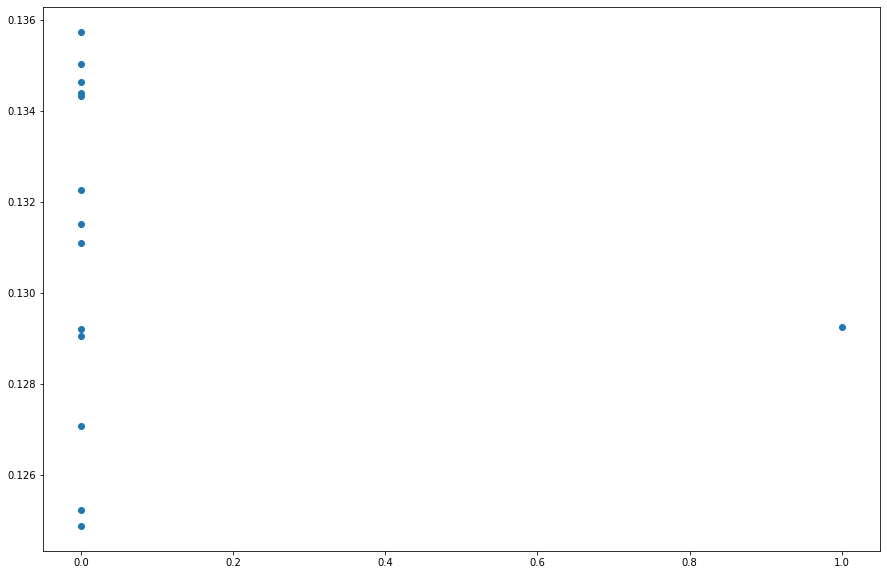

In [67]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)

In [42]:
model = LinearRegression().fit(x,y)

In [43]:
r_sq = model.score(x,y)
print(r_sq)

0.0017047954284397093


In [44]:
intercept = model.intercept_
slope = model.coef_

In [69]:
y_pred = intercept + slope*x